In [6]:
import intake
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import intake_esm
#url = intake_esm.tutorial.get_url('google_cmip6')
#p
url ="https://raw.githubusercontent.com/NOAA-IPSL/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"

import dask

dask.config.set(scheduler='threads')
dask.config.set(num_workers=20) 

let us load the data

In [7]:
cat = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")
cat

In [8]:
cat.unique()

activity_id            [HighResMIP, CMIP, CFMIP, ScenarioMIP, AerChem...
institution_id         [CMCC, EC-Earth-Consortium, MOHC, ECMWF, NOAA-...
source_id              [CMCC-CM2-HR4, EC-Earth3P-HR, HadGEM3-GC31-MM,...
experiment_id          [highresSST-present, piControl, control-1950, ...
member_id              [r1i1p1f1, r1i3p1f1, r1i2p1f1, r1i1p1f2, r2i1p...
table_id               [Amon, 6hrPlev, 3hr, day, EmonZ, E3hr, 6hrPlev...
variable_id            [ps, rsds, rlus, rlds, psl, hurs, huss, hus, h...
grid_label             [gn, gr, gr1, grz, gr2, gr2z, gr1z, gr3, gm, gnz]
zstore                 [gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4...
dcpp_init_year         [1920.0, 1992.0, 2007.0, 2006.0, 2008.0, 1968....
version                [20170706, 20170811, 20170818, 20170831, 20170...
derived_variable_id                                                   []
dtype: object

In [9]:
test = cat.search(
    activity_id = 'OMIP',
    source_id = 'IPSL-CM6A-LR',
    member_id = 'r1i1p1f1',
    grid_label = 'gn'
)
test.unique()

activity_id                                                       [OMIP]
institution_id                                                    [IPSL]
source_id                                                 [IPSL-CM6A-LR]
experiment_id                                                    [omip1]
member_id                                                     [r1i1p1f1]
table_id                                                     [Omon, Ofx]
variable_id            [volo, vo, vmo, o2, uo, tos, thkcello, thetao,...
grid_label                                                          [gn]
zstore                 [gs://cmip6/CMIP6/OMIP/IPSL/IPSL-CM6A-LR/omip1...
dcpp_init_year                                                        []
version                                                       [20191120]
derived_variable_id                                                   []
dtype: object

let us extract IPSL-CM6A OMIP data from the main dataset.

it seems that there are 2 separate member_ids, let us separate the two.

In [10]:
IPSL_CM6A_filtered_vol = cat.search(
    activity_id = 'OMIP',
    source_id = 'IPSL-CM6A-LR',
    member_id = 'r1i1p1f1',
    grid_label = 'gn',
    variable_id = ['dissic', 'no3', 'ph', 'so', 'chl', 'pp']
)
IPSL_CM6A_filtered_vol.df

activity_id institution_id     source_id experiment_id member_id table_id  \
0        OMIP           IPSL  IPSL-CM6A-LR         omip1  r1i1p1f1     Omon   
1        OMIP           IPSL  IPSL-CM6A-LR         omip1  r1i1p1f1     Omon   
2        OMIP           IPSL  IPSL-CM6A-LR         omip1  r1i1p1f1     Omon   
3        OMIP           IPSL  IPSL-CM6A-LR         omip1  r1i1p1f1     Omon   
4        OMIP           IPSL  IPSL-CM6A-LR         omip1  r1i1p1f1     Omon   

  variable_id grid_label                                             zstore  \
0          so         gn  gs://cmip6/CMIP6/OMIP/IPSL/IPSL-CM6A-LR/omip1/...   
1          pp         gn  gs://cmip6/CMIP6/OMIP/IPSL/IPSL-CM6A-LR/omip1/...   
2          ph         gn  gs://cmip6/CMIP6/OMIP/IPSL/IPSL-CM6A-LR/omip1/...   
3      dissic         gn  gs://cmip6/CMIP6/OMIP/IPSL/IPSL-CM6A-LR/omip1/...   
4         no3         gn  gs://cmip6/CMIP6/OMIP/IPSL/IPSL-CM6A-LR/omip1/...   

   dcpp_init_year   version  
0             NaN  20191120  
1             NaN  20191120  
2             NaN  20191120  
3             NaN  20191120  
4             NaN  20191120

In [11]:
IPSL_CM6A_filtered_area = cat.search(
    activity_id = 'OMIP',
    source_id = 'IPSL-CM6A-LR',
    member_id = 'r1i1p1f1',
    grid_label = 'gn',
    variable_id = ['dpco2', 'fgco2', 'intdic', 'phos', 'spco2']
)
IPSL_CM6A_filtered_area.df

activity_id institution_id     source_id experiment_id member_id table_id  \
0        OMIP           IPSL  IPSL-CM6A-LR         omip1  r1i1p1f1     Omon   
1        OMIP           IPSL  IPSL-CM6A-LR         omip1  r1i1p1f1     Omon   
2        OMIP           IPSL  IPSL-CM6A-LR         omip1  r1i1p1f1     Omon   
3        OMIP           IPSL  IPSL-CM6A-LR         omip1  r1i1p1f1     Omon   
4        OMIP           IPSL  IPSL-CM6A-LR         omip1  r1i1p1f1     Omon   

  variable_id grid_label                                             zstore  \
0       spco2         gn  gs://cmip6/CMIP6/OMIP/IPSL/IPSL-CM6A-LR/omip1/...   
1        phos         gn  gs://cmip6/CMIP6/OMIP/IPSL/IPSL-CM6A-LR/omip1/...   
2      intdic         gn  gs://cmip6/CMIP6/OMIP/IPSL/IPSL-CM6A-LR/omip1/...   
3       fgco2         gn  gs://cmip6/CMIP6/OMIP/IPSL/IPSL-CM6A-LR/omip1/...   
4       dpco2         gn  gs://cmip6/CMIP6/OMIP/IPSL/IPSL-CM6A-LR/omip1/...   

   dcpp_init_year   version  
0             NaN  20191120  
1             NaN  20191120  
2             NaN  20191120  
3             NaN  20191120  
4             NaN  20191120

In [12]:
IPSL_CM6A_filtered_norm = cat.search(
    activity_id = 'OMIP',
    source_id = 'IPSL-CM6A-LR',
    member_id = 'r1i1p1f1',
    grid_label = 'gn',
    variable_id = ['zsatarag', 'talk']
)
IPSL_CM6A_filtered_norm.df

activity_id institution_id     source_id experiment_id member_id table_id  \
0        OMIP           IPSL  IPSL-CM6A-LR         omip1  r1i1p1f1     Omon   

  variable_id grid_label                                             zstore  \
0        talk         gn  gs://cmip6/CMIP6/OMIP/IPSL/IPSL-CM6A-LR/omip1/...   

   dcpp_init_year   version  
0             NaN  20191120

In [13]:
IPSL_CM6A_filtered_cello = cat.search(
    activity_id = 'OMIP',
    source_id = 'IPSL-CM6A-LR',
    member_id = 'r1i1p1f1',
    grid_label = 'gn',
    variable_id = ['areacello', 'volcello', 'thkcello']
)
IPSL_CM6A_filtered_cello.df

activity_id institution_id     source_id experiment_id member_id table_id  \
0        OMIP           IPSL  IPSL-CM6A-LR         omip1  r1i1p1f1     Omon   
1        OMIP           IPSL  IPSL-CM6A-LR         omip1  r1i1p1f1      Ofx   

  variable_id grid_label                                             zstore  \
0    thkcello         gn  gs://cmip6/CMIP6/OMIP/IPSL/IPSL-CM6A-LR/omip1/...   
1   areacello         gn  gs://cmip6/CMIP6/OMIP/IPSL/IPSL-CM6A-LR/omip1/...   

   dcpp_init_year   version  
0             NaN  20191120  
1             NaN  20191120

let us now load all the actual data.

In [19]:
dset_dict_vol = IPSL_CM6A_filtered_vol.to_dataset_dict(
    xarray_open_kwargs={"consolidated": True, "decode_times": True, "use_cftime": True}
)
dset_dict_area = IPSL_CM6A_filtered_area.to_dataset_dict(
    xarray_open_kwargs={"consolidated": True, "decode_times": True, "use_cftime": True}
)
dset_dict_norm = IPSL_CM6A_filtered_norm.to_dataset_dict(
    xarray_open_kwargs={"consolidated": True, "decode_times": True, "use_cftime": True}
)
dset_dict_cello = IPSL_CM6A_filtered_cello.to_dataset_dict(
    xarray_open_kwargs={"consolidated": True, "decode_times": True, "use_cftime": True}
)

#setting up volcello and areacello
temp = dset_dict_cello['OMIP.IPSL.IPSL-CM6A-LR.omip1.Ofx.gn']
areas = temp['areacello']
temp = dset_dict_cello['OMIP.IPSL.IPSL-CM6A-LR.omip1.Omon.gn']
volumes = temp['thkcello'].isel(olevel=0) * areas
totvols = temp['thkcello'] * areas
total_volume = volumes.sum(dim=['y', 'x'])
total_area = areas.sum(dim=['y', 'x'])

#loading other data
vol_data = dset_dict_vol['OMIP.IPSL.IPSL-CM6A-LR.omip1.Omon.gn']
area_data = dset_dict_area['OMIP.IPSL.IPSL-CM6A-LR.omip1.Omon.gn']
norm_data = dset_dict_norm['OMIP.IPSL.IPSL-CM6A-LR.omip1.Omon.gn']


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


### plotting talk
unused

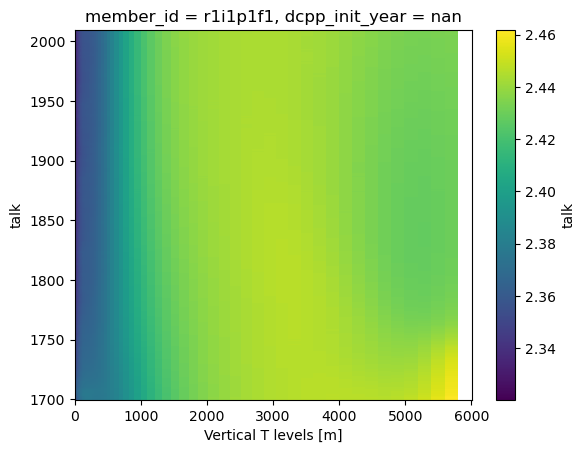

In [16]:
# for var in norm_data.data_vars.values():
norm_data['talk'].mean(dim=('y','x')).groupby('time.year').mean().plot()
plt.ylabel(norm_data['talk'].name)
plt.show()

### plotting surface data

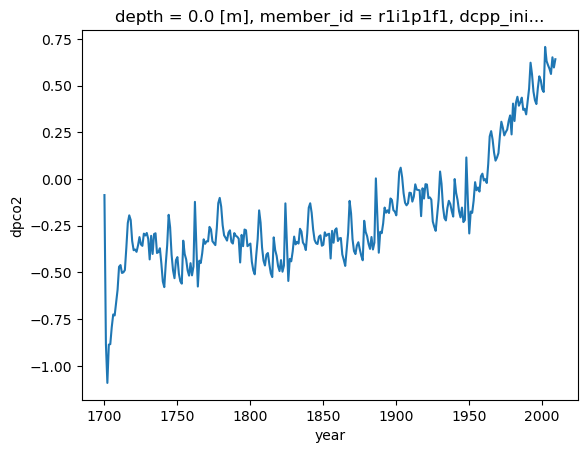

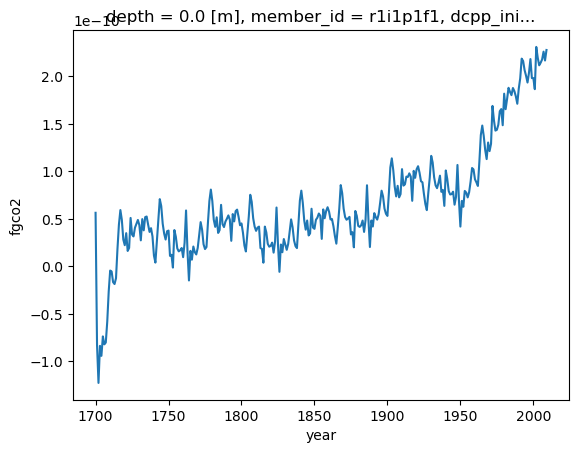

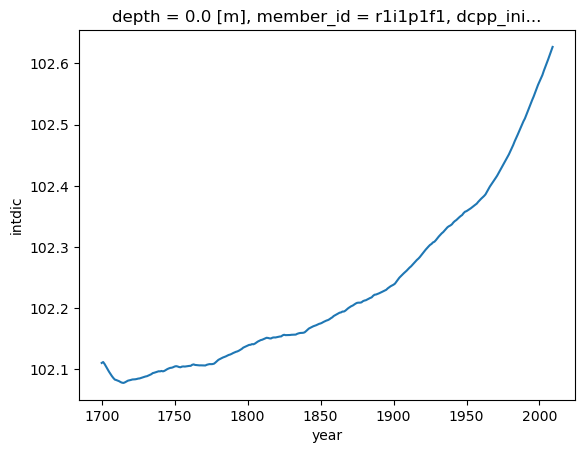

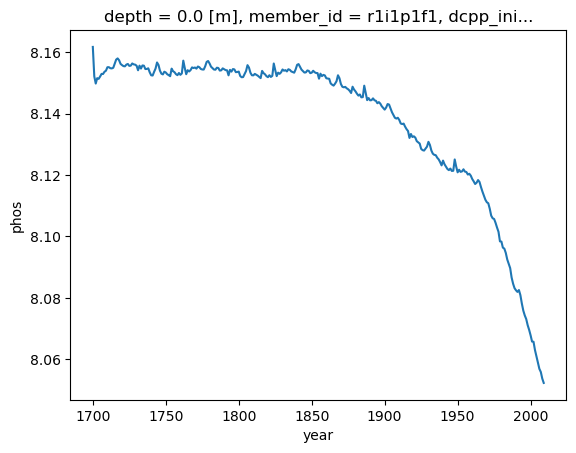

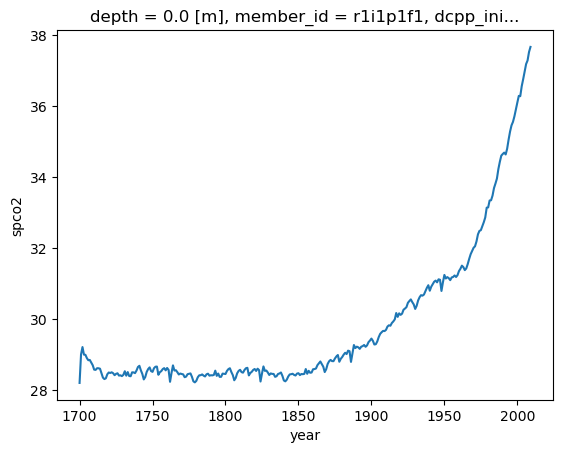

In [17]:
for var in area_data.data_vars.values():
    try:
        ((var.groupby('time.year').mean() * areas).sum(dim=['y', 'x']) / total_area).plot()
    except:
        try:
            ((var.isel(lev_partial=0).groupby('time.year').mean() * areas).sum(dim=['y', 'x']) / total_area).plot()
        except:
            ((var.isel(olevel=0).groupby('time.year').mean() * areas).sum(dim=['y', 'x']) / total_area).plot()
    
    # plt.title(var.name)
    plt.ylabel(var.name)
    plt.show()

### plotting volume data

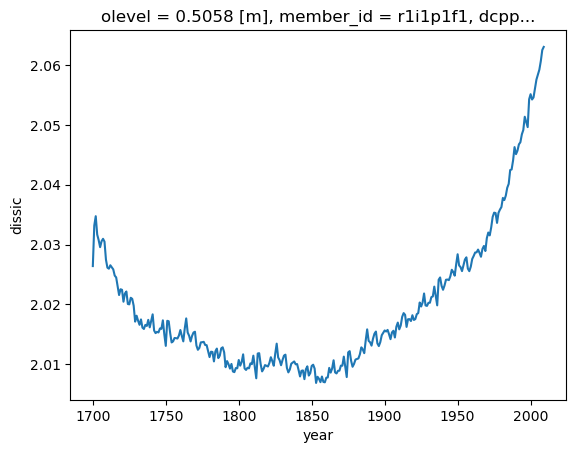

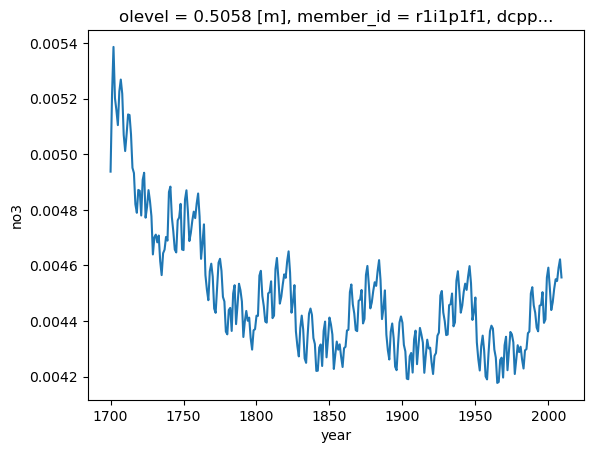

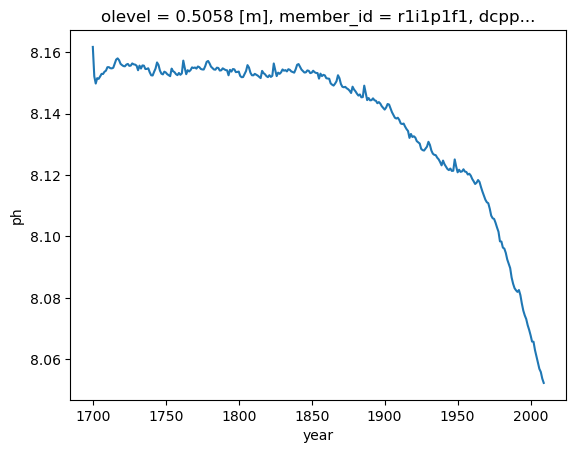

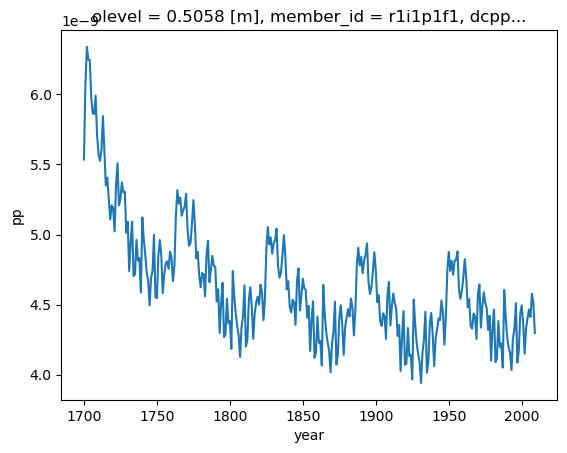

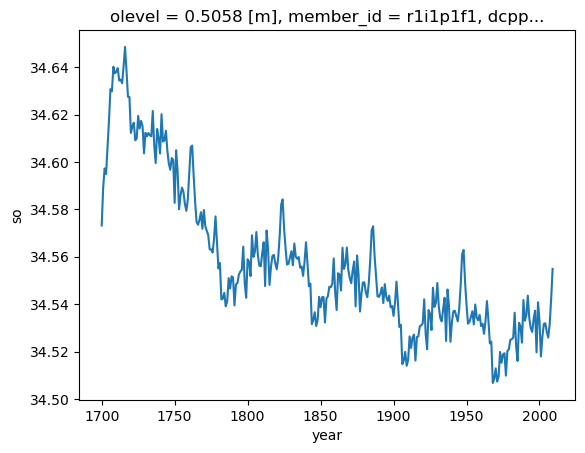

In [18]:
for var in vol_data.data_vars.values():
    try:
        ((var.isel(lev=0) * volumes).sum(dim=['y', 'x']) / total_volume).groupby('time.year').mean().plot()
    
    except:
        try:
            ((var.isel(lev_partial=0) * volumes).sum(dim=['y', 'x']) / total_volume).groupby('time.year').mean().plot()
        except:
            ((var.isel(olevel=0) * volumes).sum(dim=['y', 'x']) / total_volume).groupby('time.year').mean().plot()
    plt.ylabel(var.name)
    plt.show()

### plotting pH array

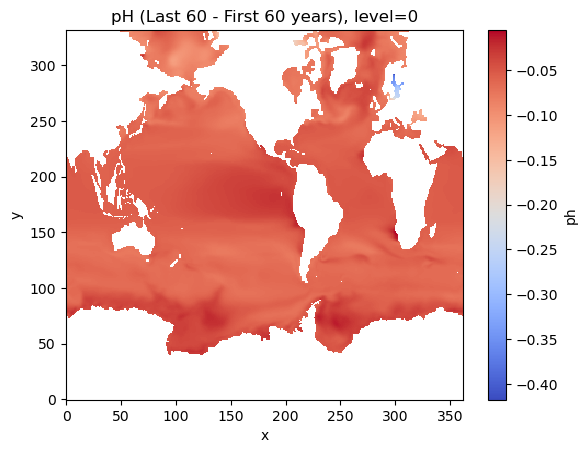

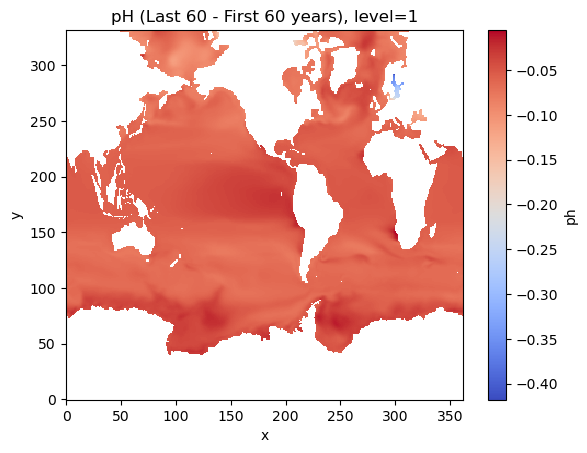

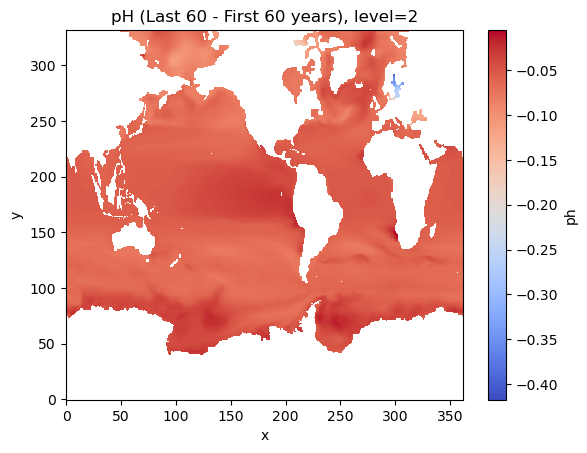

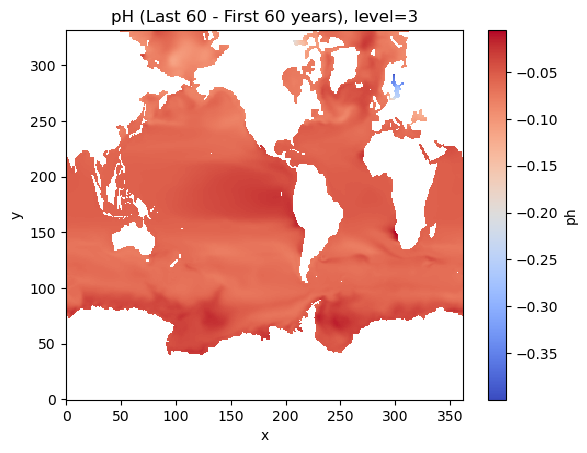

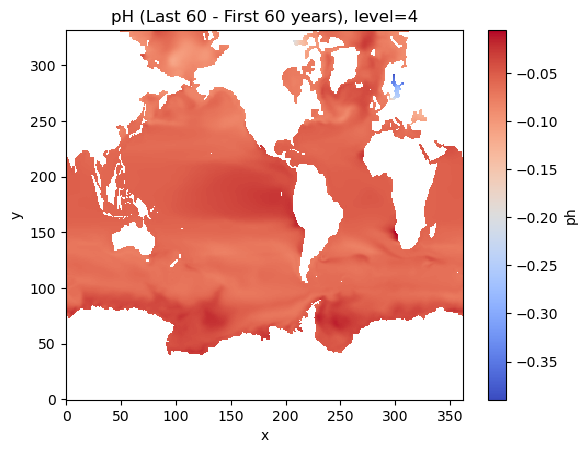

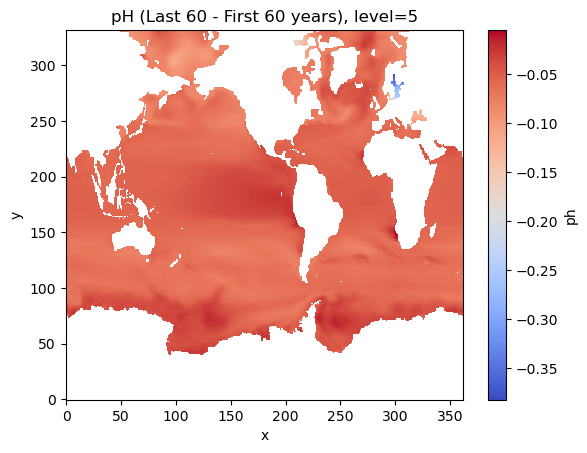

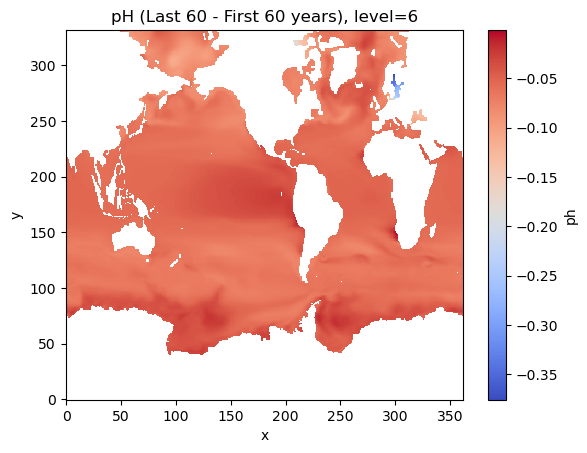

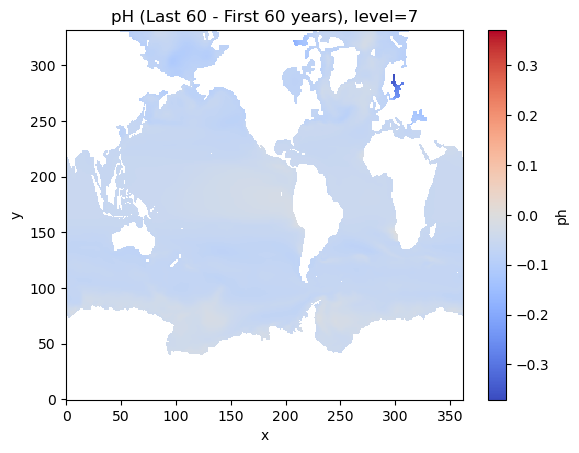

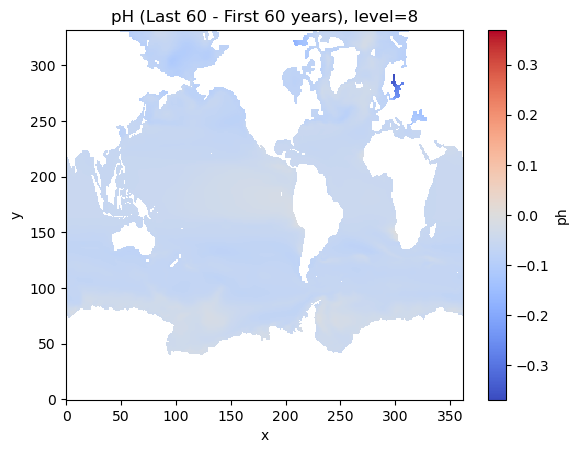

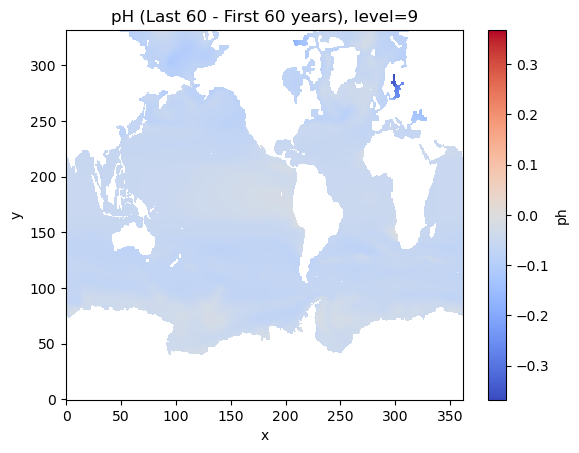

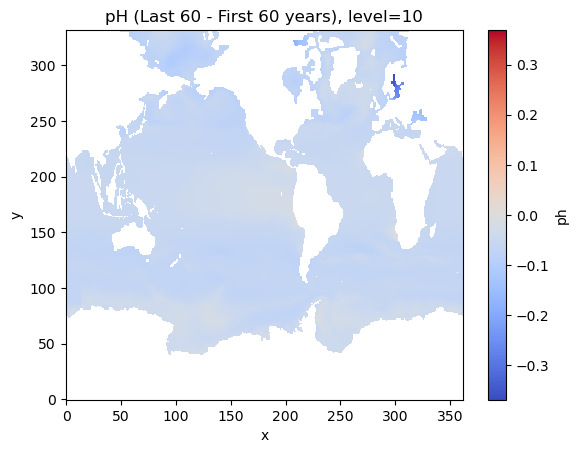

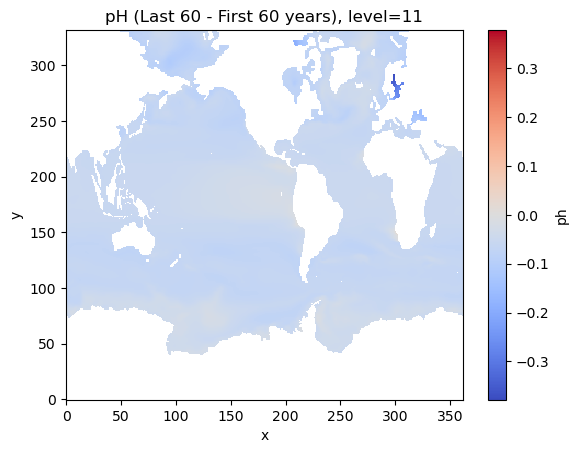

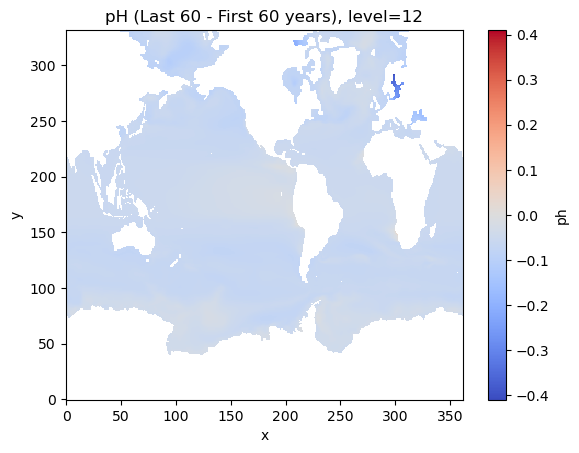

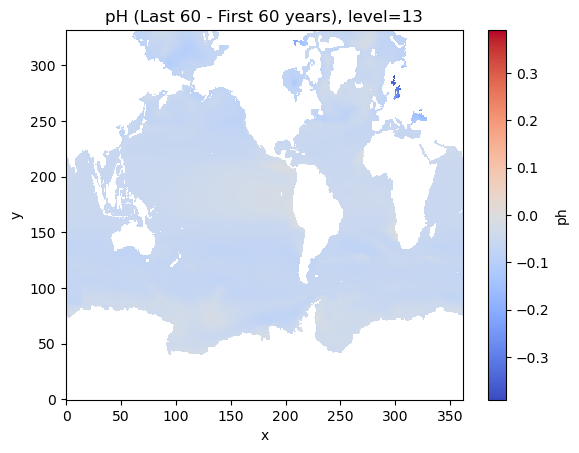

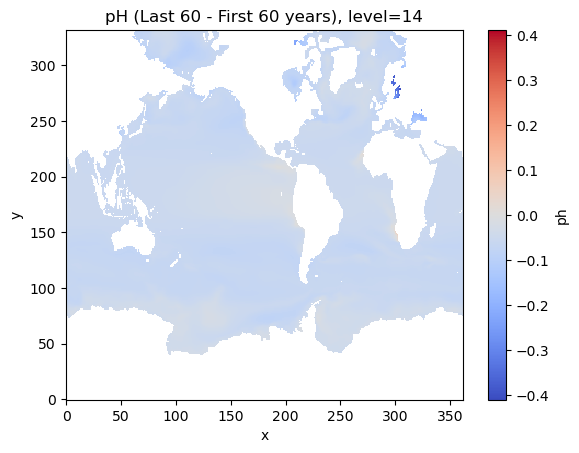

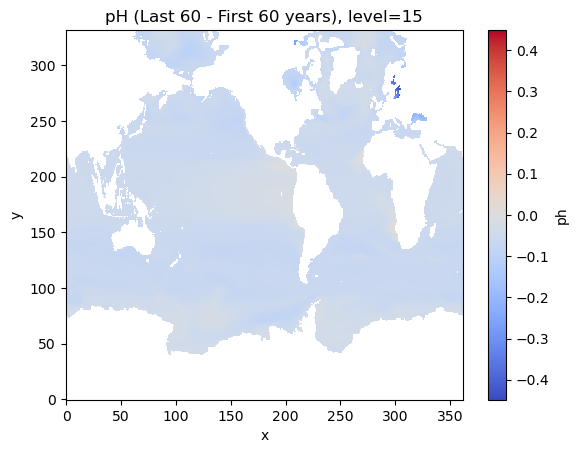

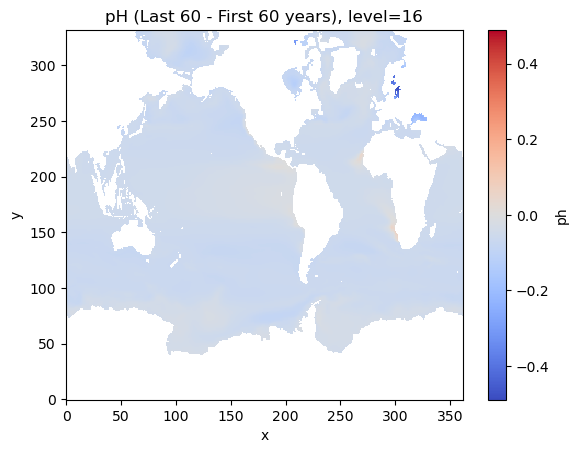

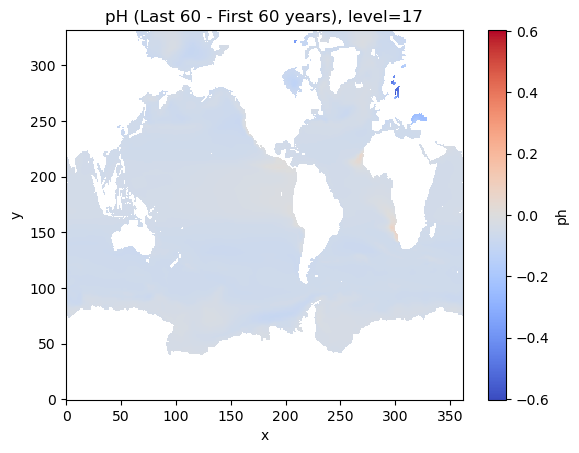

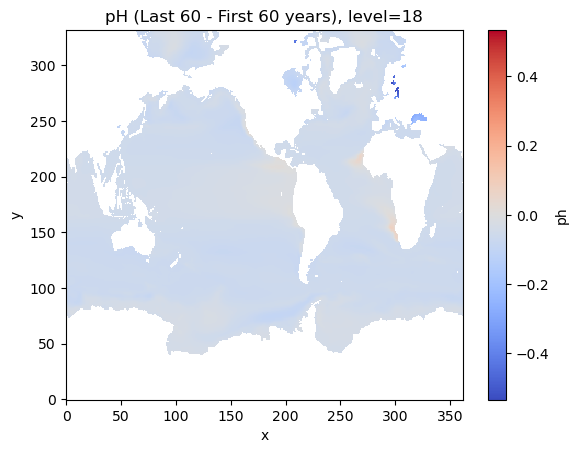

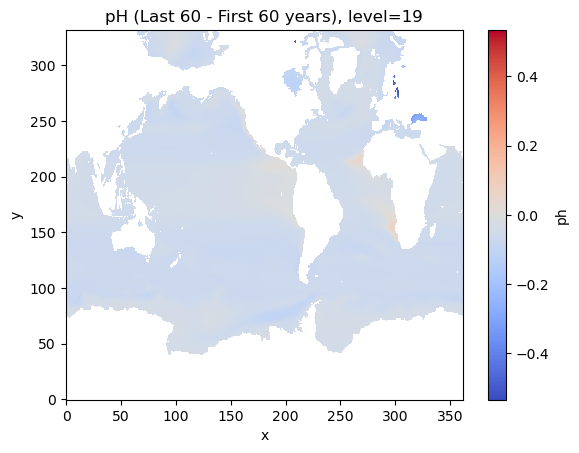

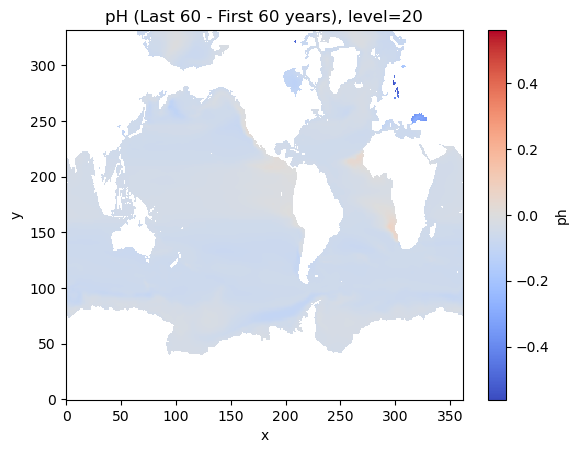

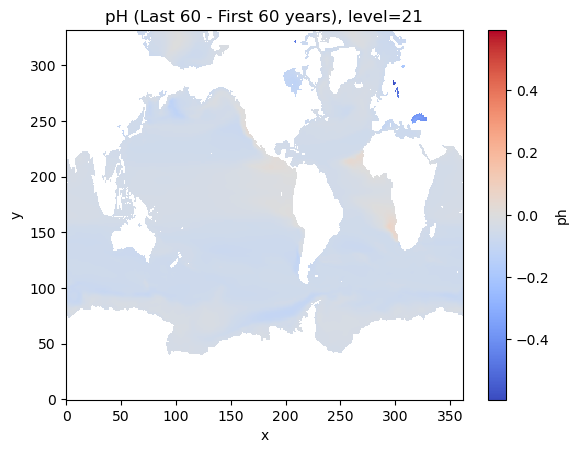

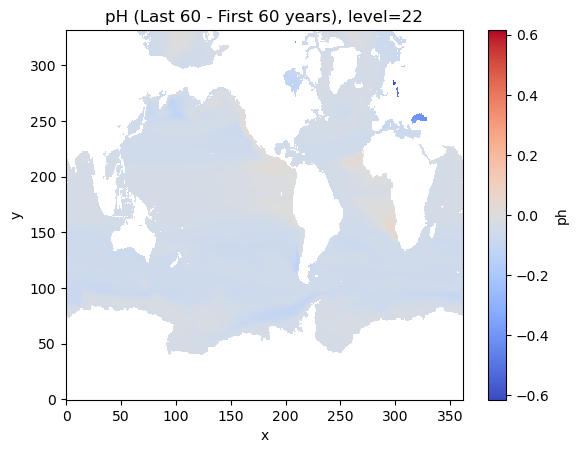

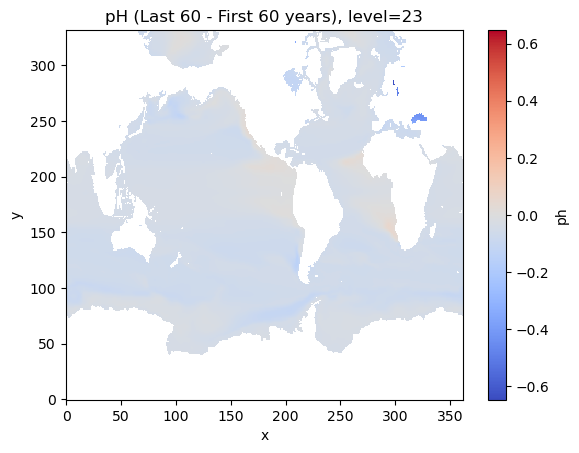

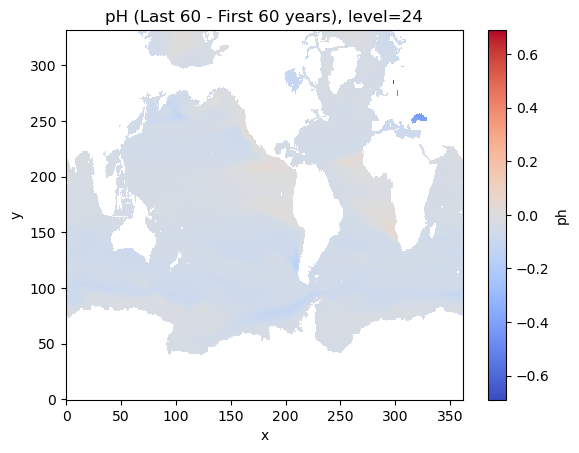

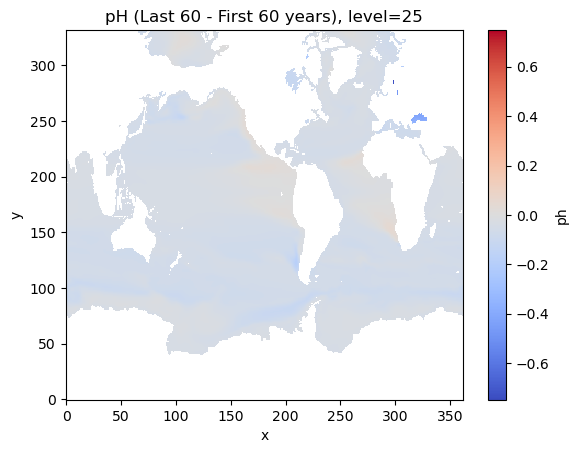

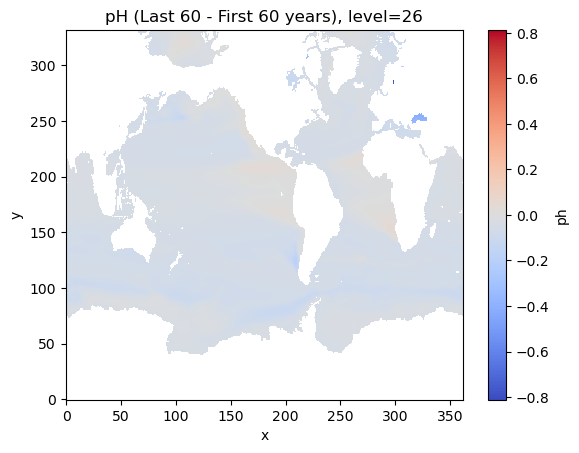

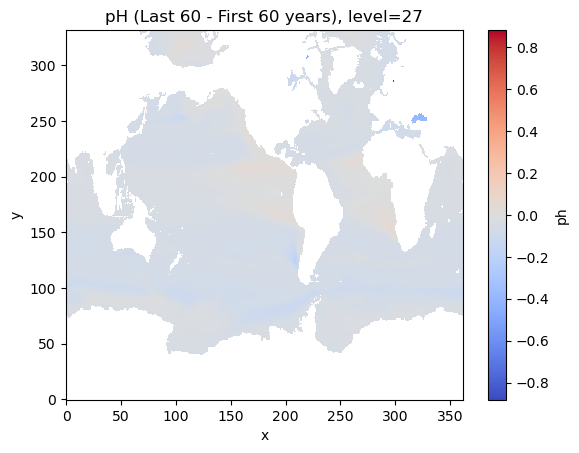

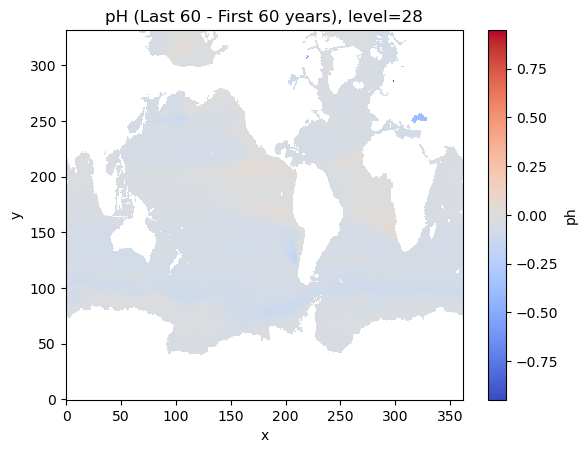

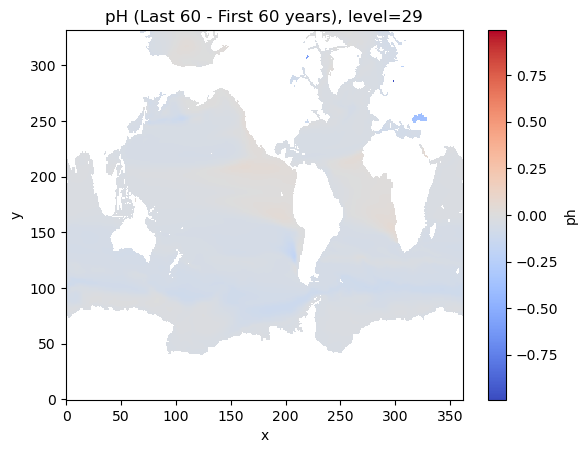

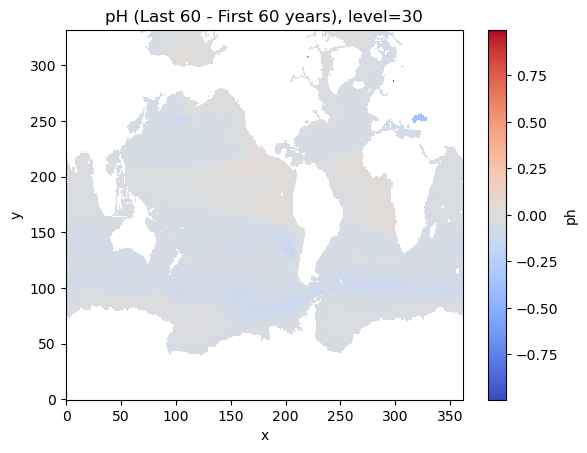

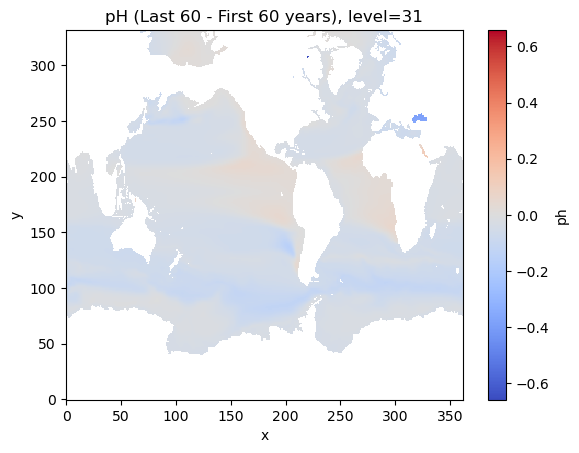

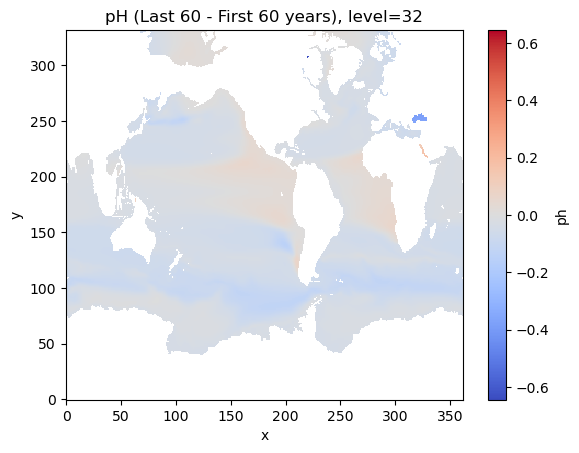

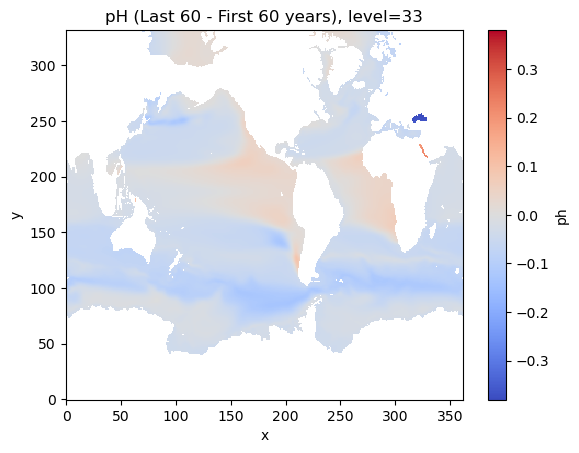

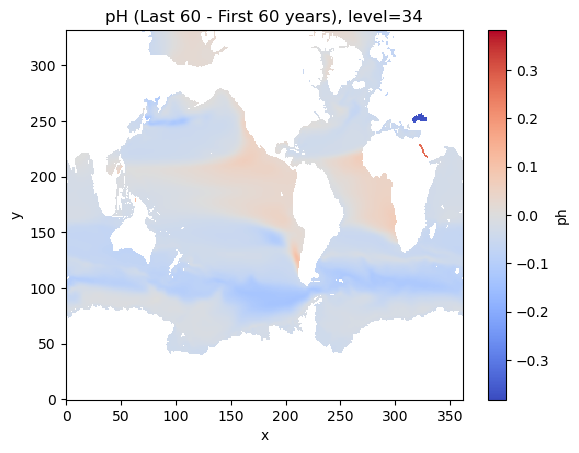

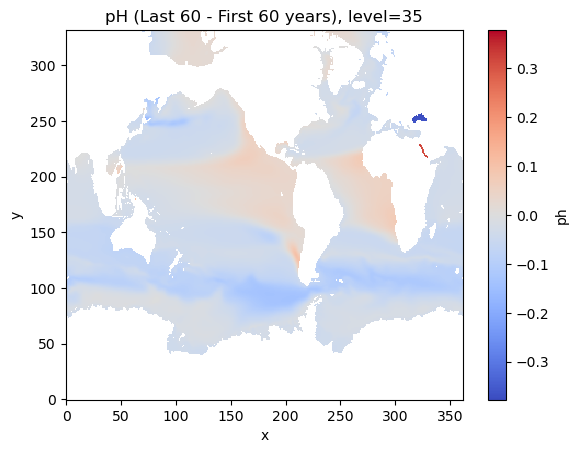

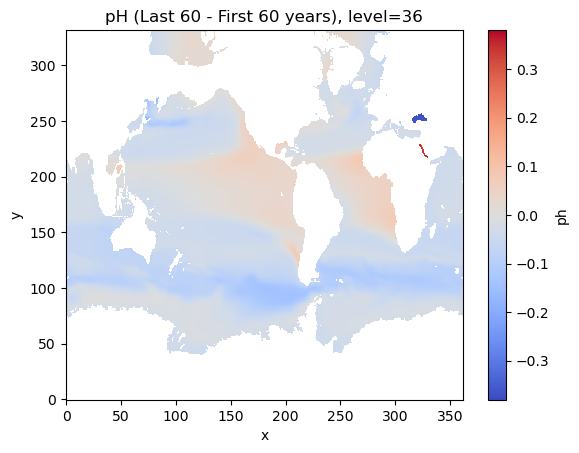

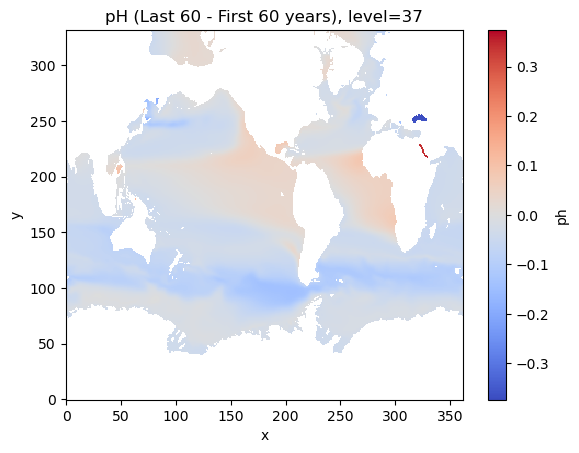

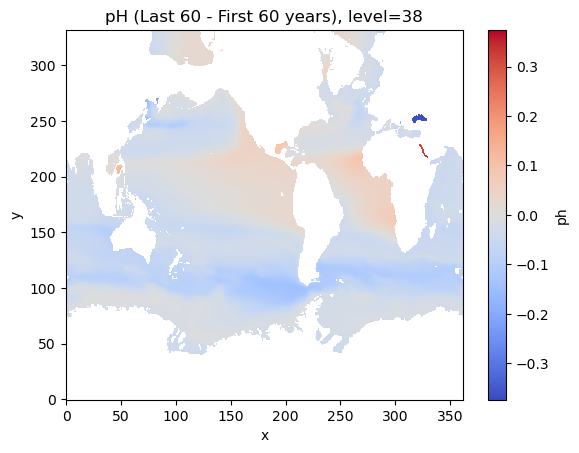

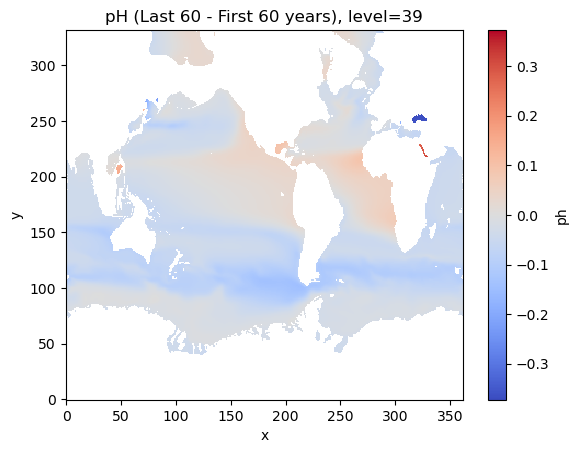

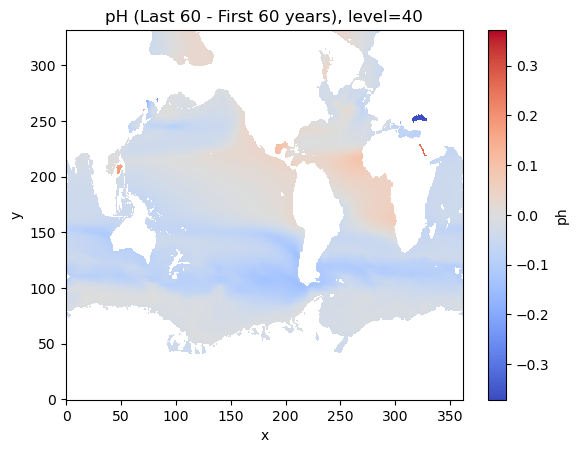

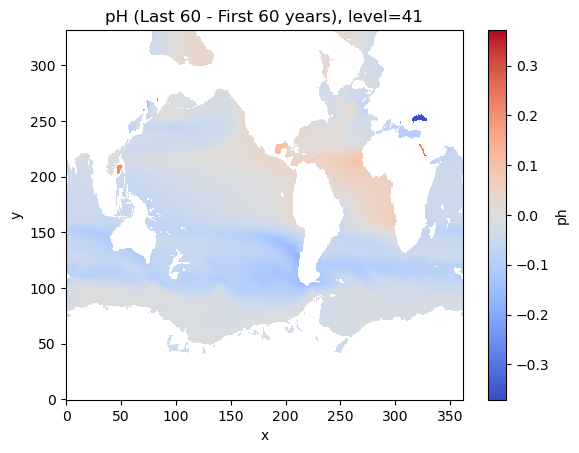

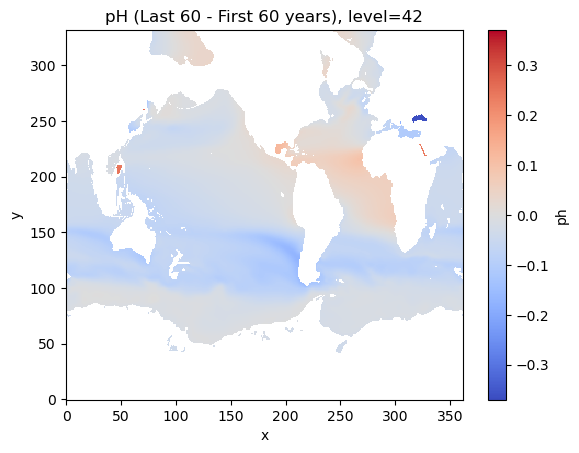

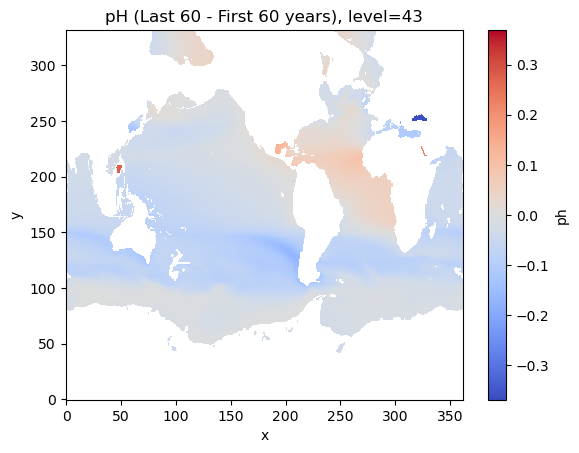

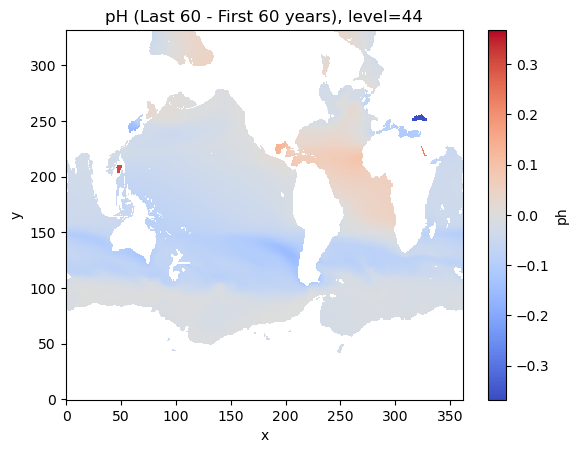

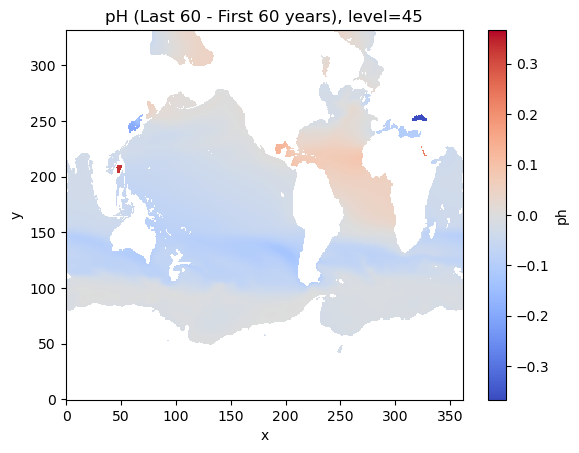

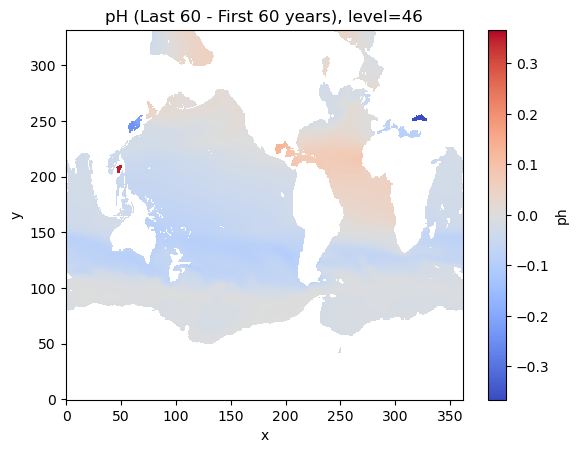

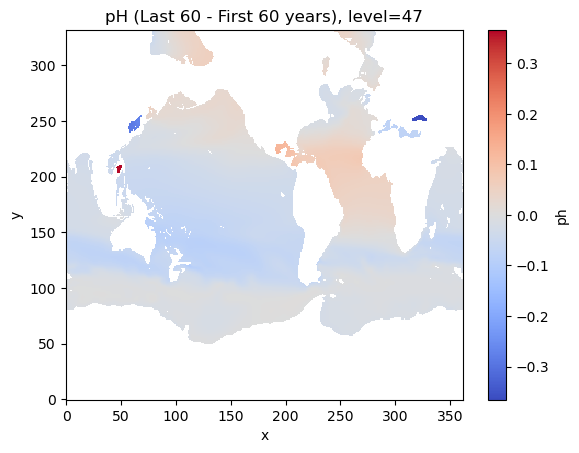

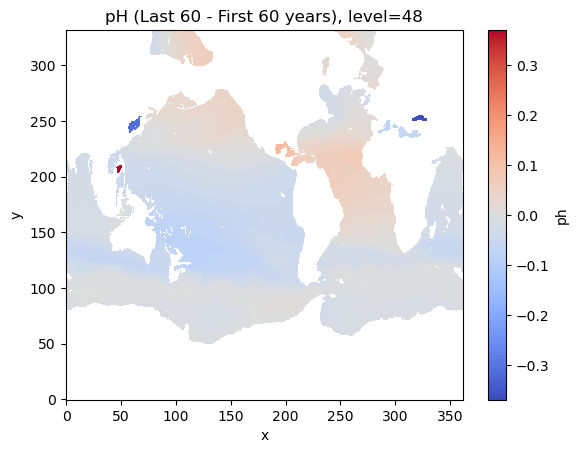

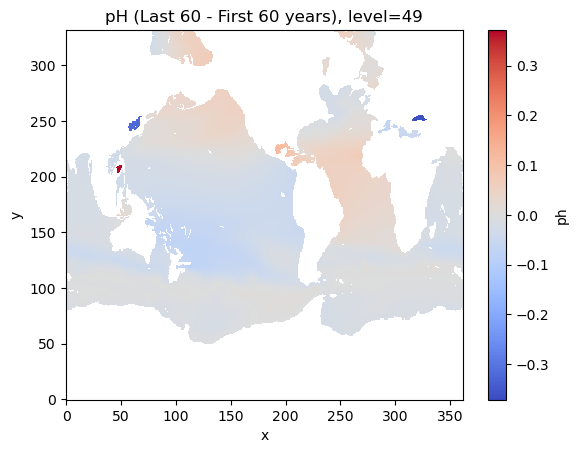

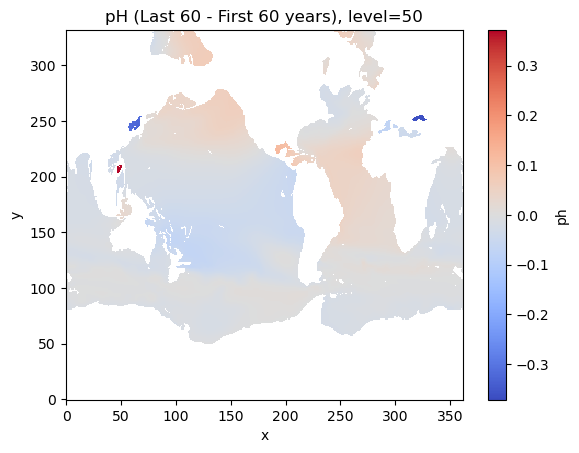

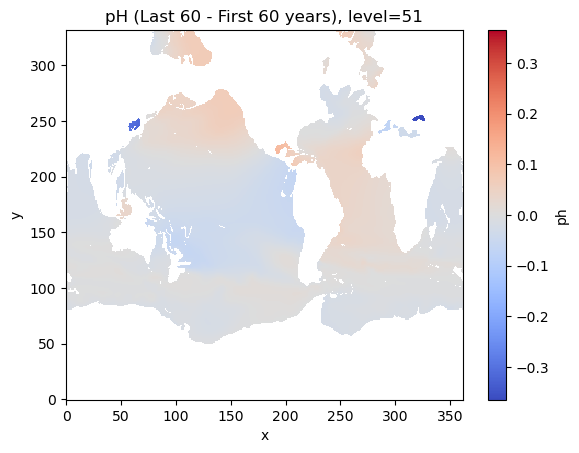

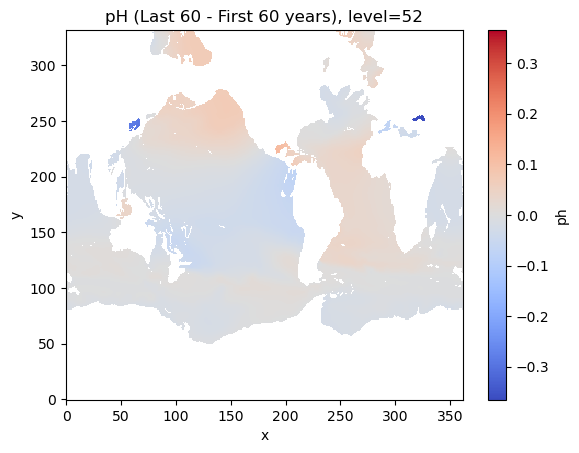

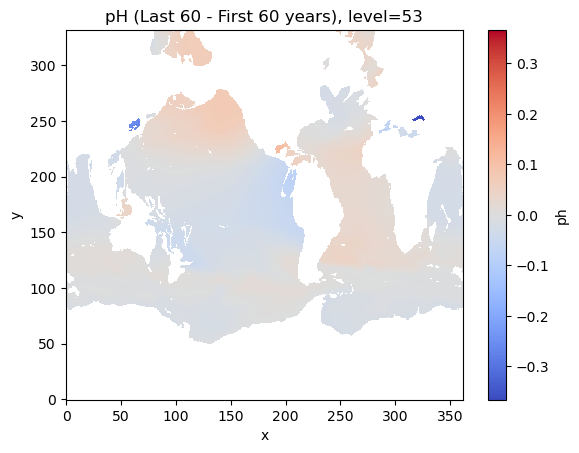

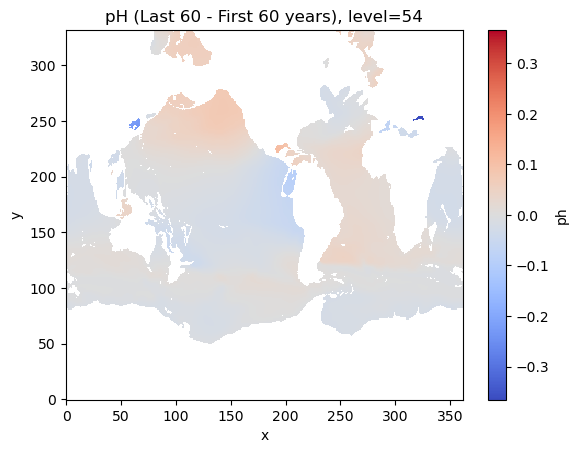

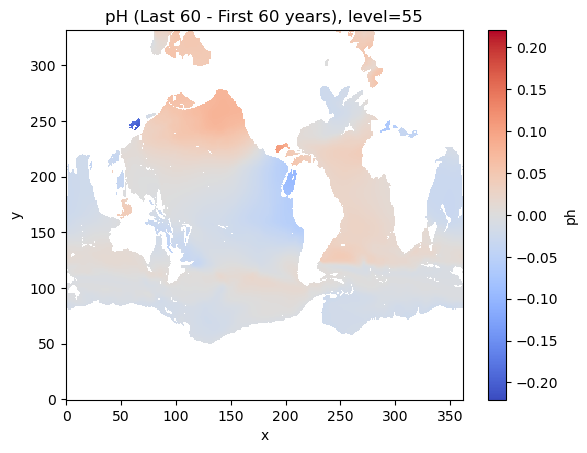

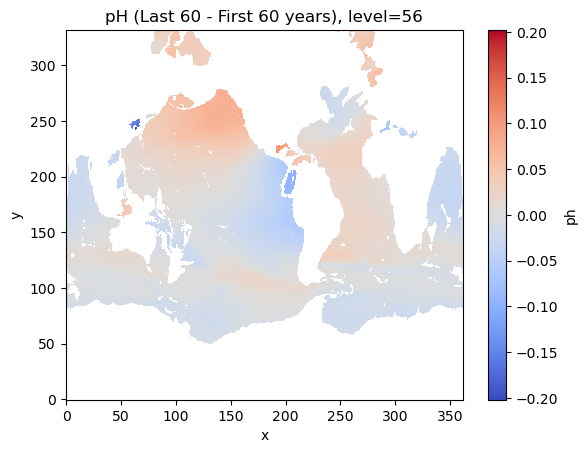

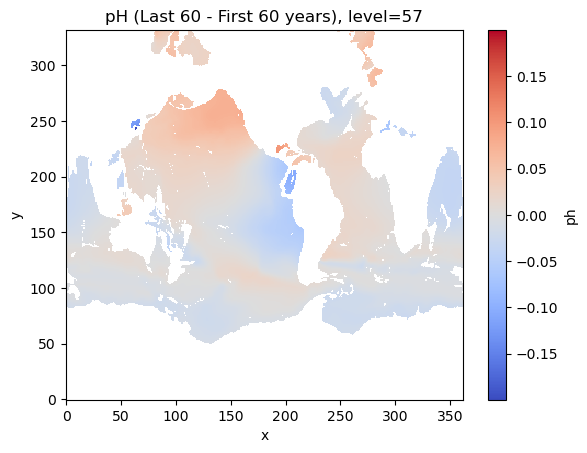

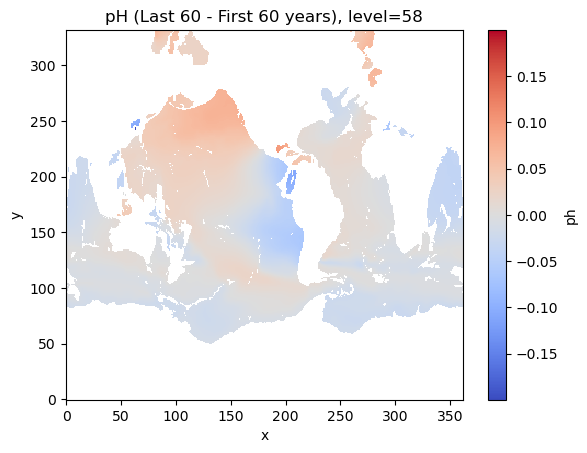

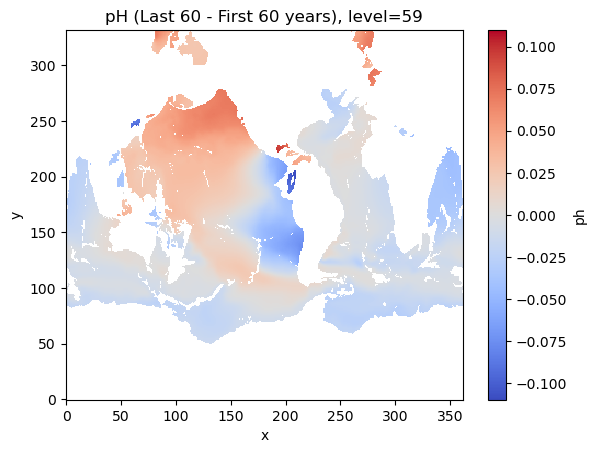

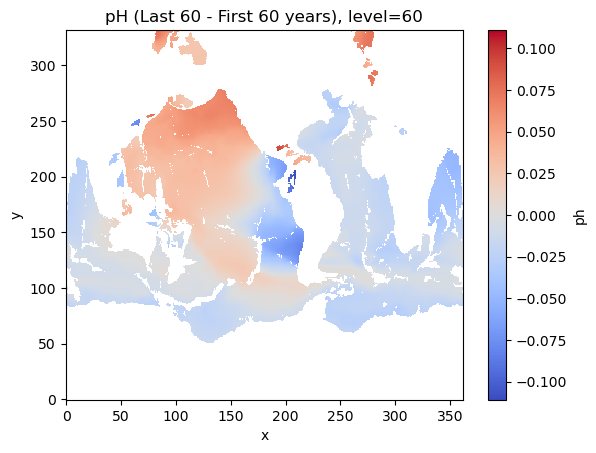

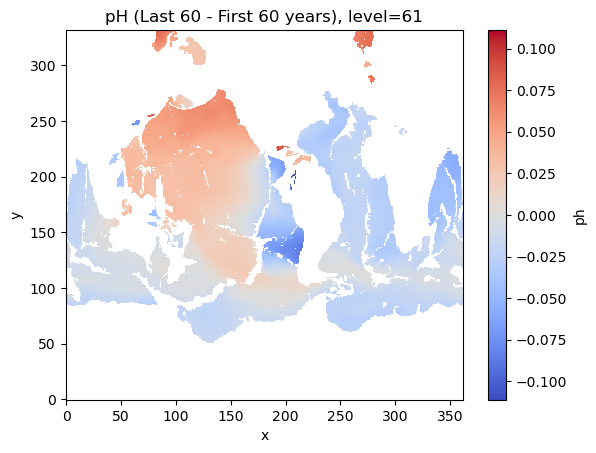

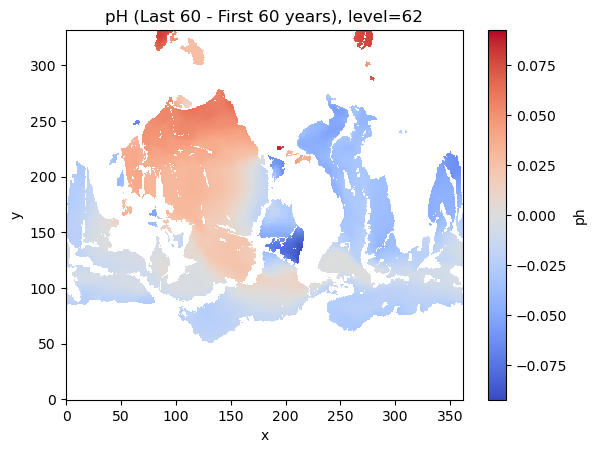

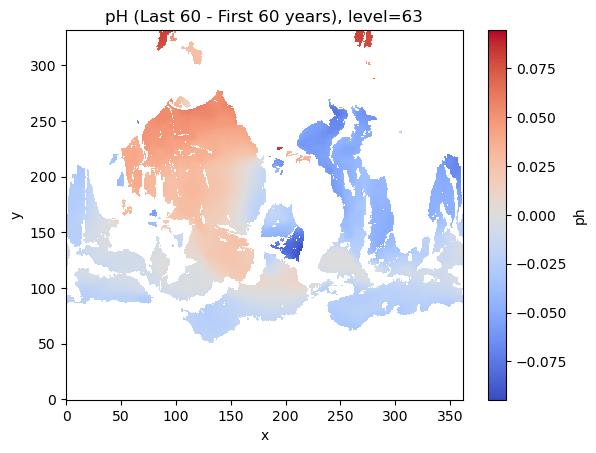

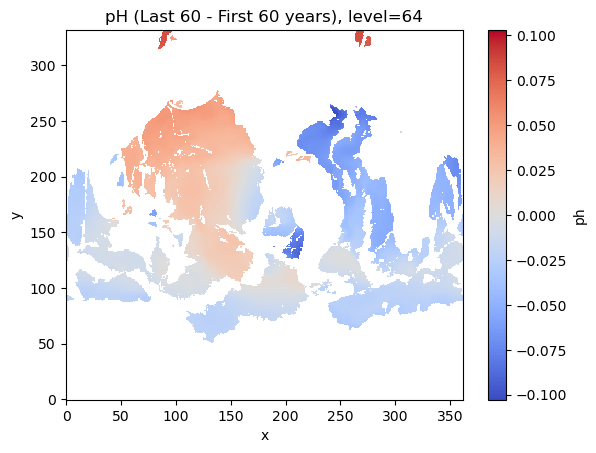

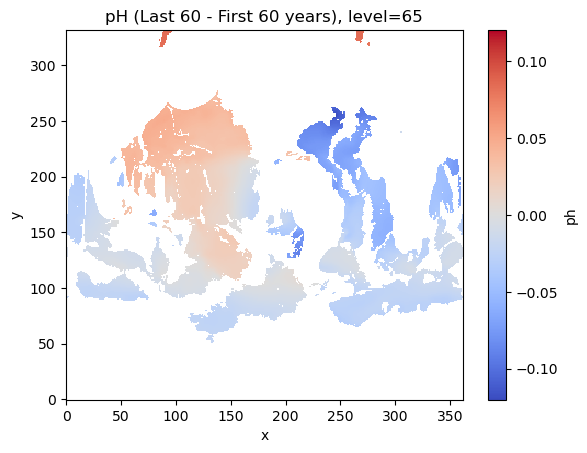

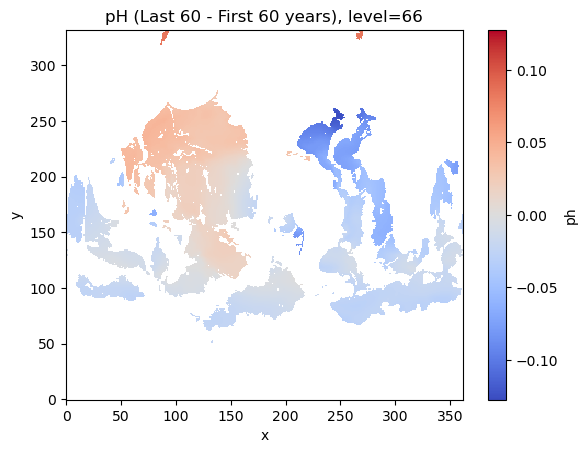

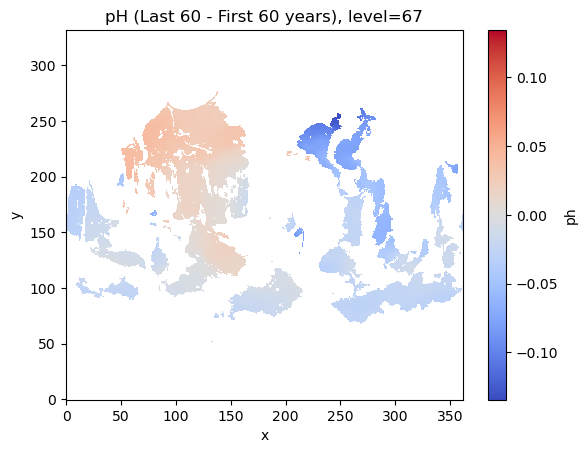

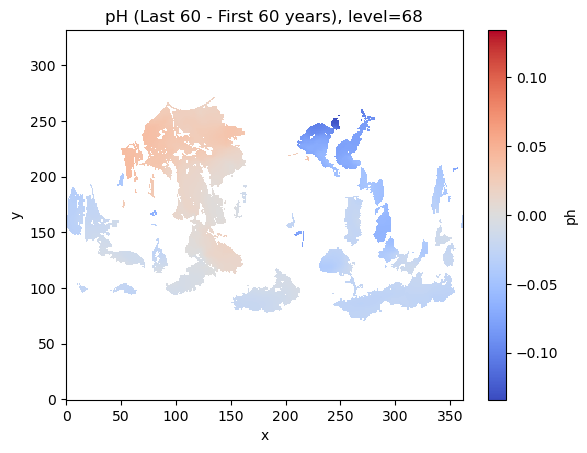

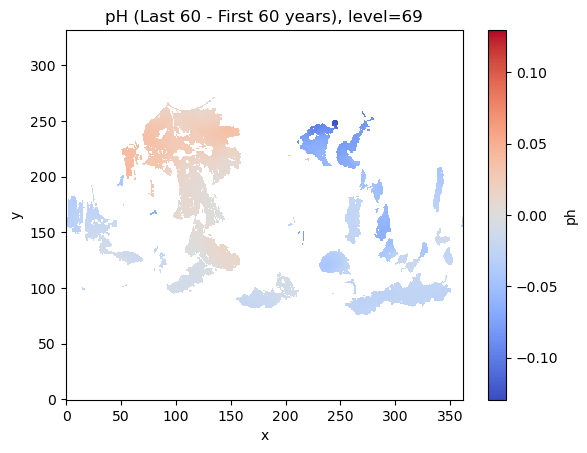

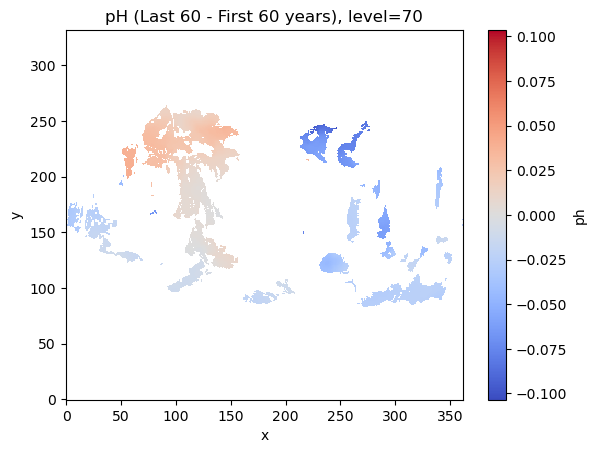

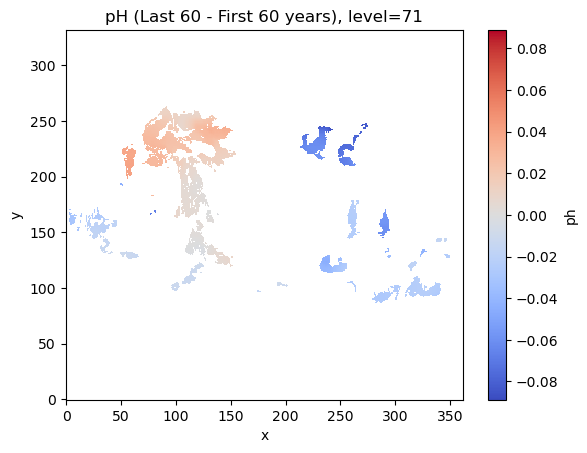

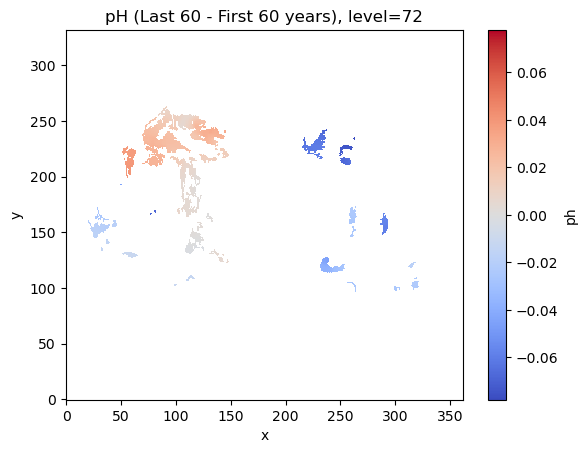

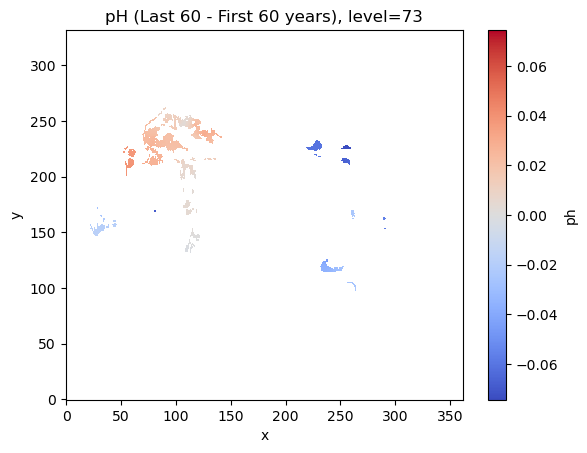

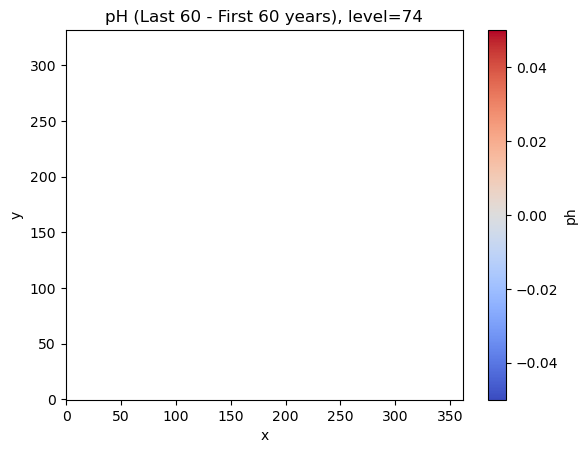

In [20]:
# Filter only for the 'ph' variable
ph_var = vol_data['ph']

# Loop through all vertical levels
for lev in range(ph_var.sizes['olevel']):
    try:
        # Get yearly average at this level
        yearly = (
            ph_var.isel(olevel=lev)
            .groupby('time.year')
            .mean()
        )
    except:
        # Fallback if 'lev_partial' is used
        yearly = (
            ph_var.isel(lev_partial=lev)
            .groupby('time.year')
            .mean()
        )

    # Get year values
    years = yearly['year'].values
    if len(years) < 120:
        print(f"Not enough years for level {lev}")
        continue

    # Compute mean of first 60 and last 60 years (grid-cell level)
    first_60 = yearly.sel(year=years[:60]).mean(dim='year')
    last_60 = yearly.sel(year=years[-60:]).mean(dim='year')

    # Compute difference map directly
    diff = last_60 - first_60

    # Plot the spatial map of pH change
    diff.plot(cmap='coolwarm')
    plt.title(f"pH (Last 60 - First 60 years), level={lev}")
    plt.show()


### plotting dissic
unused
ran for ~3900 minutes, incomplete, terminated 

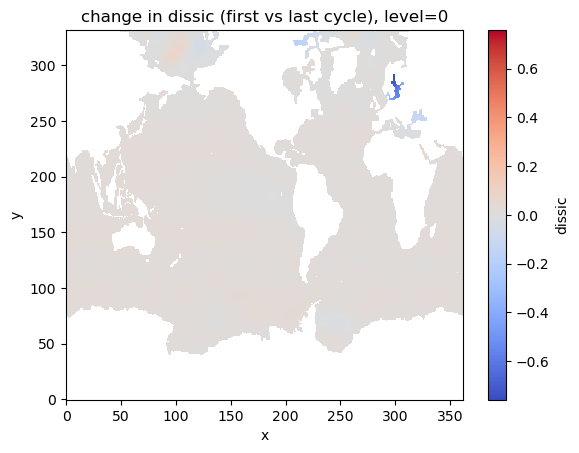

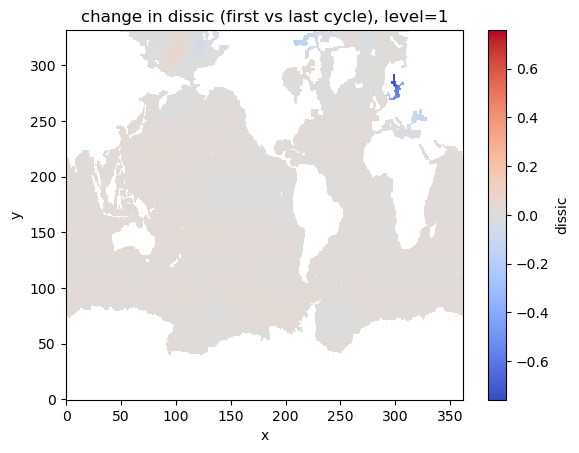

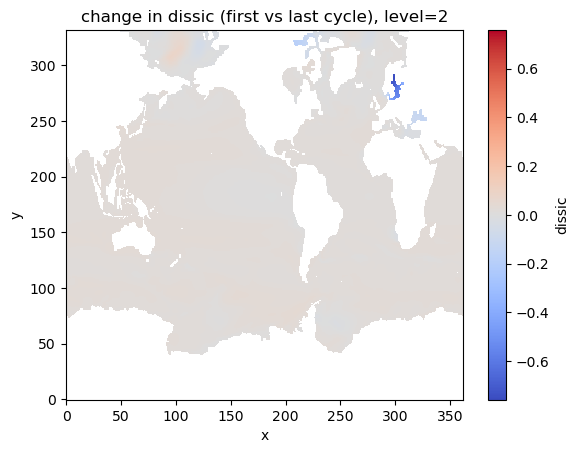

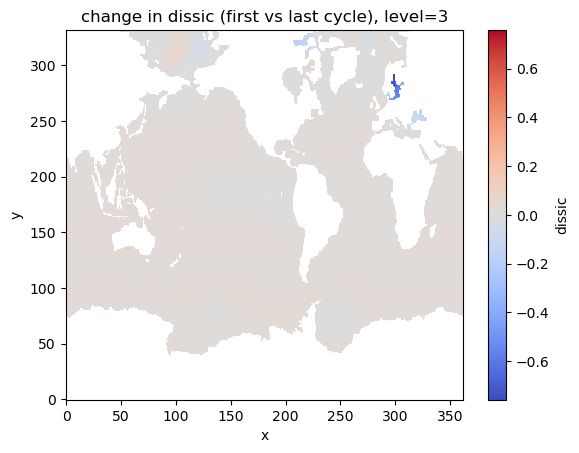

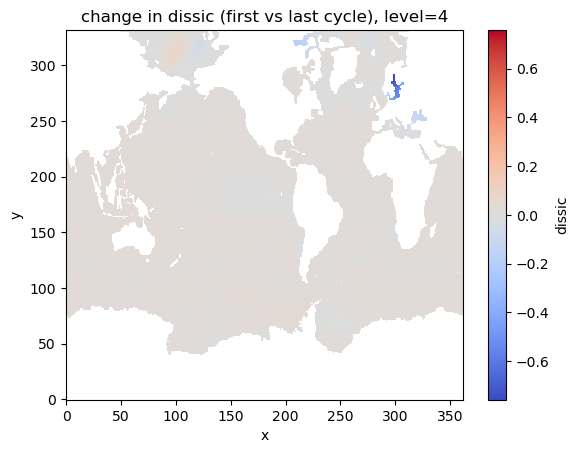

KeyboardInterrupt: 

In [ ]:
# Filter only for the 'dissic' variable
dissic_var = vol_data['dissic']

# Loop through all vertical levels
for lev in range(dissic_var.sizes['olevel']):
    try:
        # Get yearly average at this level
        yearly = (
            dissic_var.isel(olevel=lev)
            .groupby('time.year')
            .mean()
        )
    except:
        # Fallback if 'lev_partial' is used
        yearly = (
            dissic_var.isel(lev_partial=lev)
            .groupby('time.year')
            .mean()
        )

    # Get year values
    years = yearly['year'].values
    if len(years) < 120:
        print(f"Not enough years for level {lev}")
        continue

    # Compute mean of first 60 and last 60 years (grid-cell level)
    first_60 = yearly.sel(year=years[:60]).mean(dim='year')
    last_60 = yearly.sel(year=years[-60:]).mean(dim='year')

    # Compute difference map directly
    diff = last_60 - first_60

    # Plot the spatial map of pH change
    diff.plot(cmap='coolwarm')
    plt.title(f"change in dissic (first vs last cycle), level={lev}")
    plt.show()


### plotting global heatmaps

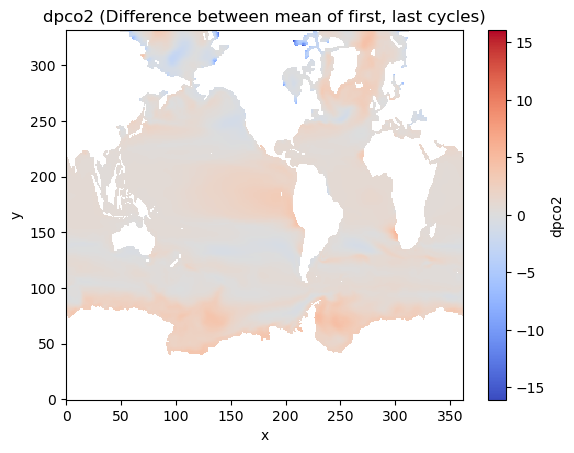

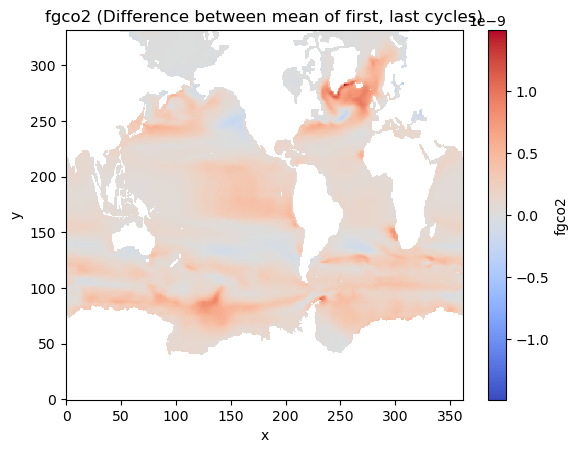

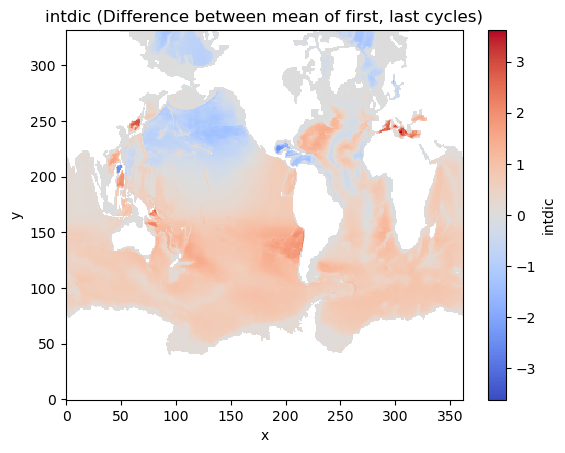

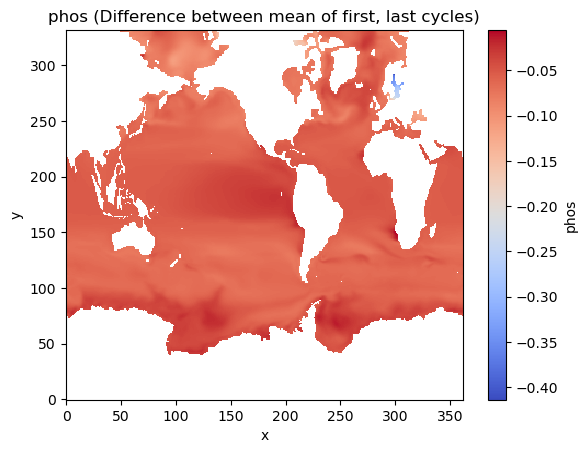

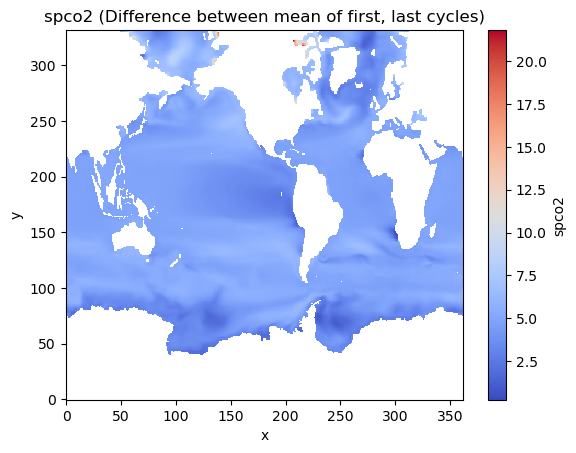

In [22]:
for var in area_data.data_vars.values():
    try:
        yearly = var.groupby('time.year').mean()
    except:
        yearly = var.isel(lev_partial=0).groupby('time.year').mean()

    years = yearly['year'].values
    if len(years) < 120:
        print(f"Not enough years for {var.name}")
        continue

    # First 60 years and last 60 years
    first_60 = yearly.sel(year=years[:61]).mean(dim='year')
    last_60 = yearly.sel(year=years[-61:]).mean(dim='year')

    diff = last_60 - first_60

    # Plot the spatial difference map
    diff.plot(cmap='coolwarm')
    plt.title(f"{var.name} (Difference between mean of first, last cycles)")
    plt.show()
